In [48]:
# Set retina display
%config InlineBackend.figure_format = 'retina'

In [49]:
import numpy as np
import matplotlib.pyplot as plt


M = 50
m_true = np.zeros(M)
m_true[20:30] = 1

sigma_blur = 2
x = np.arange(M)
G = np.zeros((M, M))
for i in range(M):
    G[i, :] = np.exp(-0.5 * ((x - i) / sigma_blur) ** 2)
G /= np.max(G)
d = G @ m_true + 0.05 * np.random.randn(M)

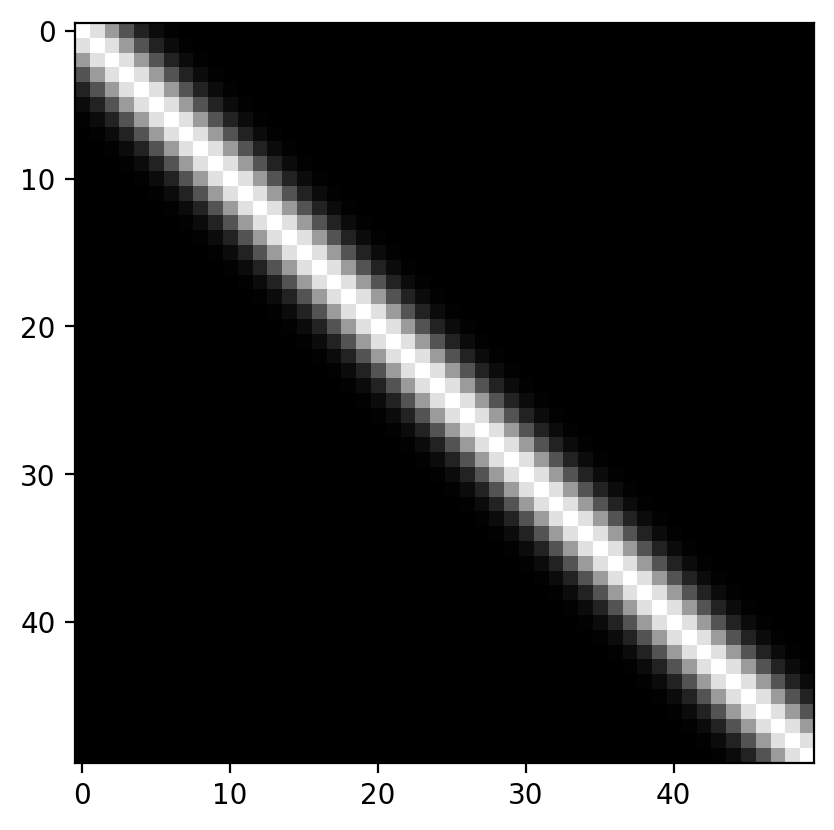

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(G, aspect='auto', cmap='gray')
ax.set(aspect='equal')
plt.show()

U, s, Vt = np.linalg.svd(G)
alpha = np.logspace(-4, 0, 50)

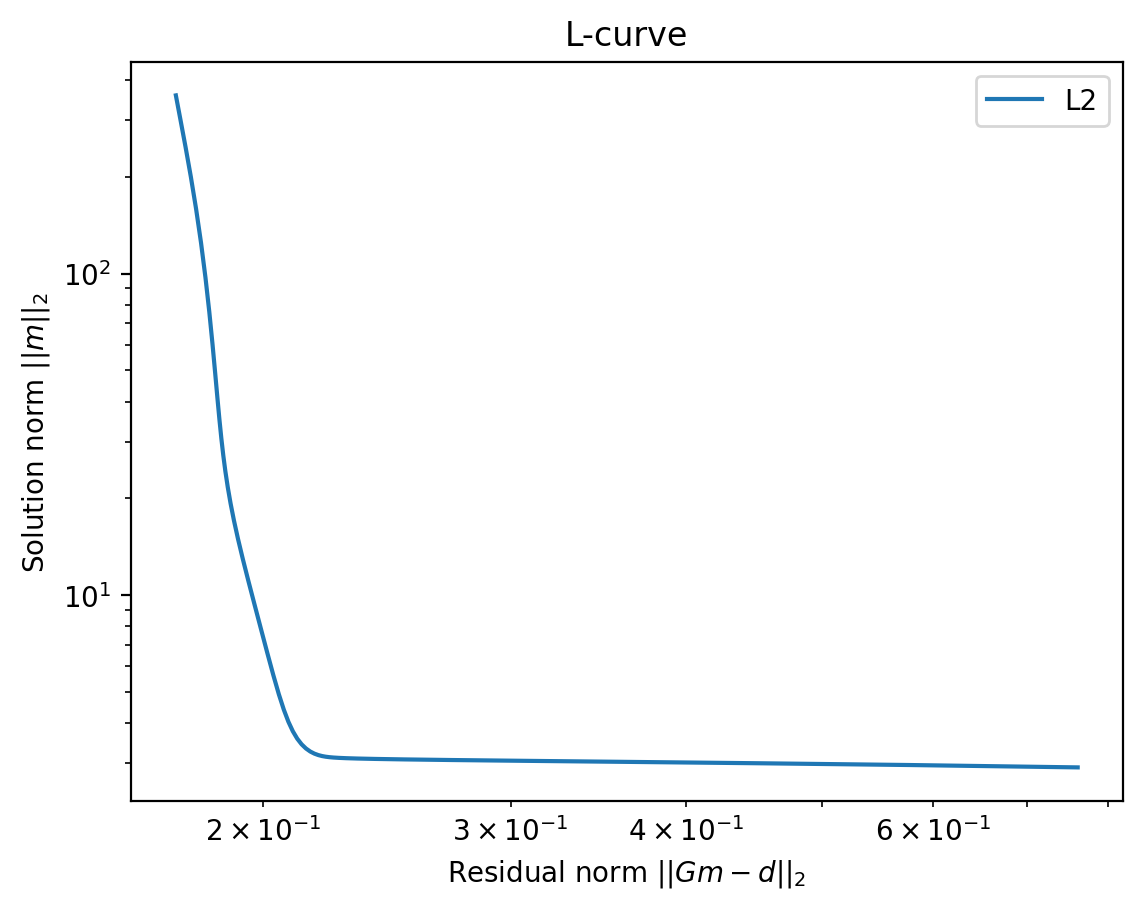

In [51]:
res_norm1 = []
sol_norm1 = []
for a in alpha:
    m1 = Vt.T @ np.diag(s / (s**2 + a**2)) @ U.T @ d
    # m1 = np.linalg.inv(G.T @ G + a**2 * np.eye(M)) @ G.T @ d
    res_norm1.append(np.linalg.norm(G @ m1 - d))
    sol_norm1.append(np.linalg.norm(m1))

fig, ax = plt.subplots()
ax.loglog(res_norm1, sol_norm1, label='L2')
ax.set_xlabel('Residual norm $||Gm - d||_2$')
ax.set_ylabel('Solution norm $||m||_2$')
ax.set_title('L-curve')
ax.legend()
plt.show()